In [1]:
import matplotlib.pyplot as plt
import preprocess as pp
import cv2
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

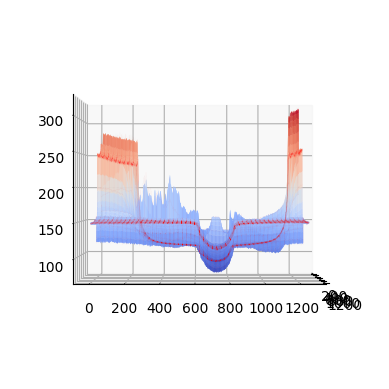

In [3]:
image_path = "/home/VirtualFlaw/Data/Raw_jpg/202211/22C041-24-002/22C041-24-002-1st-1-(1)-1.jpg"
weld_img = pp.WeldImage(image_path)
weld_img.adjustBrightness()
weld_img.imshow_3D(0,0)


In [7]:

option = 128

weld_image = pp.WeldImage(image_path)
split_image = weld_image.splitImage(option)
bright_array = []
for i in range(len(split_image)):
    bright_array.append(np.mean(split_image[i]))
    
bright_array2 = max(bright_array) - bright_array
bright_array2 = np.tile(bright_array2, (option,1))
bright_array2 = cv2.resize(bright_array2, (2048,2048))
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (2048,2048))
image = image + bright_array2
#uint8로 바꿔줘야함
image = np.uint8(image)
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite(f"/home/VirtualFlaw/Hyun/Data/test/result/{weld_image.filename}", image)



True